In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pca import pca

In [70]:
'''
a. Interpret the results of the principal components analysis and summarize the main findings. 
Commenting on the following aspects might be useful for this: 
(1) How many components do you choose?
(2) Which proportion of the overall variance is explained? 
(3) Which concepts are captured by the components? 
(4) With which original variables are the components correlated? 
(5) Are there groups of customers and how can they be characterized?
'''

'\na. Interpret the results of the principal components analysis and summarize the main findings. \nCommenting on the following aspects might be useful for this: \n(1) How many components do you choose?\n(2) Which proportion of the overall variance is explained? \n(3) Which concepts are captured by the components? \n(4) With which original variables are the components correlated? \n(5) Are there groups of customers and how can they be characterized?\n'

In [71]:
df = pd.read_csv('customers.csv')

In [72]:
df.head()

,order,remove,new,organize,gallery,account
0,1,0,1,1,0,0
1,0,0,0,0,1,1
2,0,0,0,0,1,1
3,0,1,0,0,1,0
4,0,0,0,0,1,1


In [73]:
df_pca = pca(n_components = 4, normalize=True)

# Fit transform
pca_results = df_pca.fit_transform(df.iloc[:, :])

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


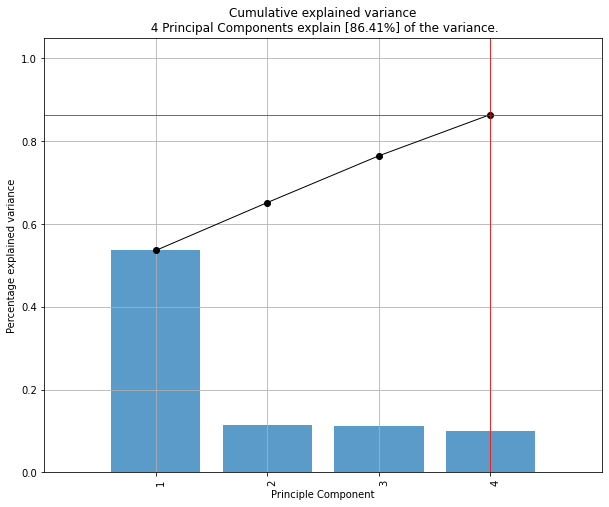

<Figure size 432x288 with 0 Axes>

In [74]:
# Plot explained variance
fig, ax = df_pca.plot()

In [75]:
print(pca_results['PC'].std()**2)

PC1    3.219285
PC2    0.694828
PC3    0.678503
PC4    0.598866
dtype: float64


even tho 6 PC explain 99% of the variance, 2-4 PC are very similar and contain almost same amount of information. For this anlysis I will choose 4 PC. 4 PC explain 85% of the variance

In [76]:
print(pca_results['loadings'])

        order    remove       new  organize   gallery   account
PC1  0.396089 -0.366788  0.456700  0.383854 -0.463313 -0.371487
PC2 -0.065428  0.016120 -0.080125  0.666451 -0.171240  0.718024
PC3  0.521293  0.843335  0.100589  0.055519 -0.056596 -0.025236
PC4  0.592428 -0.327091  0.086044 -0.498081  0.008414  0.535240


PC1 is capture almost every variance, but the biggest weight have 'new', 'order' and 'organize'
for PC2 it is 'orgnize' and 'account'
PC3: 'remove' and 'order'
PC4: 'account' and 'order'

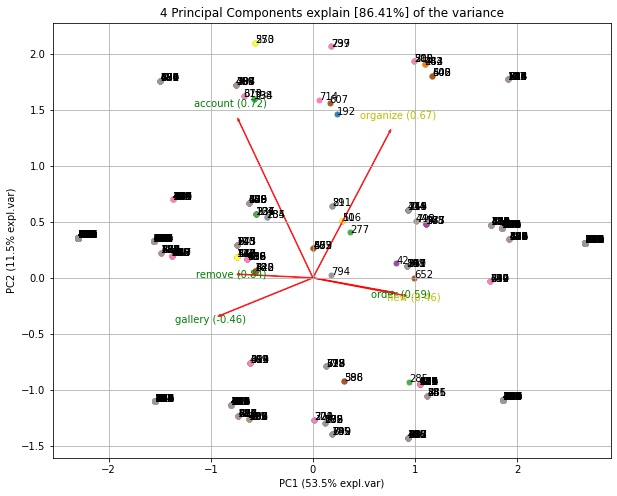

In [77]:
fig, ax = df_pca.biplot(legend=False)

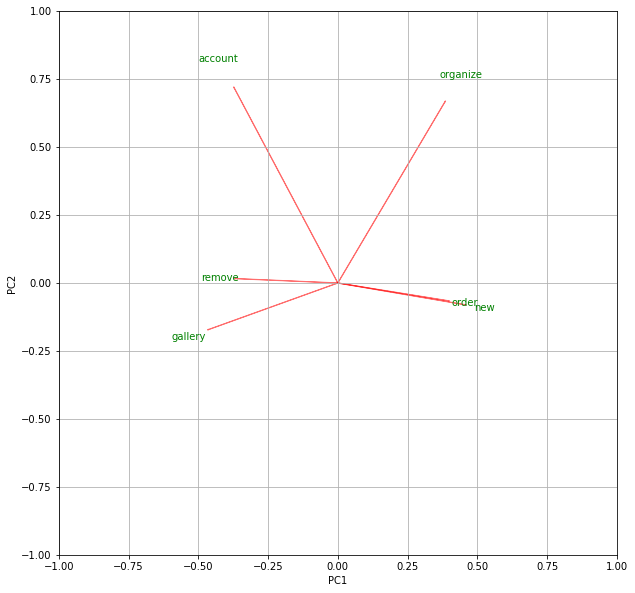

In [78]:
plt.figure(figsize=(10, 10))
coeff = pca_results["loadings"].iloc[0:2,:].transpose()
labels = df.columns.values
n = coeff.shape[0]
for i in range(n):
   plt.arrow(0, 0, coeff.iloc[i,0], coeff.iloc[i,1],color = 'r',alpha = 0.5)
   plt.text(coeff.iloc[i,0]* 1.15, coeff.iloc[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))  
plt.grid()
plt.show()

In [79]:
'''
order: Complete the transaction.
remove: Remove an article from the cart.
new: Visit a page with details about a new product.
organize: Use the search/sort/filter.
gallery: View the product gallery.
account: View the user profile.
'''

'\norder: Complete the transaction.\nremove: Remove an article from the cart.\nnew: Visit a page with details about a new product.\norganize: Use the search/sort/filter.\ngallery: View the product gallery.\naccount: View the user profile.\n'

PC1 most contrasts "remove" and "order", and "remove" and "new"
I think there are two groups.
First group of people who is innvolved with online shopping, they are order something, intersted in new products and use the search filter, so we can suggest that they are looking for a specific product on this web site, and also intersted on new things
Second group of people just browsing the internet. They have no intention to find a specific product and just browsing the whole product gllery and getting familiar with assortment. They delete some articles from the cart, but they have an account, so they are familiar with shop, they are just browsing it.


In [80]:
columns = df.columns
columns

Index(['order', 'remove', 'new', 'organize', 'gallery', 'account'], dtype='object')

In [81]:
PC1 = df_pca.results["PC"].loc[:,"PC1"]
for column in columns:
    variable = df[column]
    abs_cor_coef = np.abs(np.corrcoef(variable, PC1)[0,1])
    print(f'{column}: {abs_cor_coef}')

order: 0.7102353469307546
remove: 0.6576946794904773
new: 0.818918639607349
organize: 0.6882972424319007
gallery: 0.830776521621184
account: 0.6661221533782079


PC1 has the biggest correltion with 'new', 'gallery' and 'order'

In [82]:
PC2 = df_pca.results["PC"].loc[:,"PC2"]
for column in columns:
    variable = df[column]
    abs_cor_coef = np.abs(np.corrcoef(variable, PC2)[0,1])
    print(f'{column}: {abs_cor_coef}')

order: 0.054504068003332976
remove: 0.01342851079490908
new: 0.0667479529865912
organize: 0.555183914816838
gallery: 0.1426508867149738
account: 0.5981468180489481


PC2 has the biggest correlation with 'organize', 'account'

In [83]:
PC3 = df_pca.results["PC"].loc[:,"PC3"]
for column in columns:
    variable = df[column]
    abs_cor_coef = np.abs(np.corrcoef(variable, PC3)[0,1])
    print(f'{column}: {abs_cor_coef}')

order: 0.42912906401915696
remove: 0.6942341746365179
new: 0.08280467898732924
organize: 0.04570304588955317
gallery: 0.04659000995180227
account: 0.020774014662333855


PC3 has the biggest correlation with 'remove' and 'order'

In [84]:
PC4 = df_pca.results["PC"].loc[:,"PC4"]
for column in columns:
    variable = df[column]
    abs_cor_coef = np.abs(np.corrcoef(variable, PC4)[0,1])
    print(f'{column}: {abs_cor_coef}')

order: 0.45817375640613095
remove: 0.252966956450749
new: 0.06654516442408993
organize: 0.385207342218166
gallery: 0.006506986417252385
account: 0.41394553438766857


PC4 has the biggest correlation with 'order', 'organize' and 'account'